# Tips Data using Naive Bayes

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
df=sns.load_dataset("tips")

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Summarize the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Descriptive Summary of Data

In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Check if there were any null values

In [6]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Check if there were any duplicate columns

In [7]:
df.duplicated().sum()

1

### Check the column which is Duplicated

In [8]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


### Drop the Duplicated Column

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size


## Check if there is any imbalancement in Dataset w.r.t Dependent Feature, i.e,, Smoker

In [11]:
len(df[df["sex"]=="Female"]),len(df[df["sex"]=="Male"])

(86, 157)

### Handle this Imbalancement

In [12]:
minor=df[df["sex"]=="Female"]
major=df[df["sex"]=="Male"]

In [13]:
from sklearn.utils import resample

In [14]:
minor_new=resample(minor,replace=True,n_samples=len(major),random_state=42)

In [15]:
len(minor_new)

157

### Check whether all the data points in minor_new were Female or not

In [16]:
len(minor_new[minor_new["sex"]=="Female"])

157

### Combine Minor_new and Major

In [17]:
df=pd.concat([minor_new,major])

In [18]:
df

,total_bill,tip,sex,smoker,day,time,size
140,17.47,3.50,Female,No,Thur,Lunch,2
57,26.41,1.50,Female,No,Sat,Dinner,2
203,16.40,2.50,Female,Yes,Thur,Lunch,2
162,16.21,2.00,Female,No,Sun,Dinner,3
74,14.73,2.20,Female,No,Sat,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


### Shuffle the DataFrame

In [19]:
df=df.sample(frac=1)

In [20]:
df

,total_bill,tip,sex,smoker,day,time,size
111,7.25,1.00,Female,No,Sat,Dinner,1
168,10.59,1.61,Female,Yes,Sat,Dinner,2
140,17.47,3.50,Female,No,Thur,Lunch,2
8,15.04,1.96,Male,No,Sun,Dinner,2
138,16.00,2.00,Male,Yes,Thur,Lunch,2
...,...,...,...,...,...,...,...
140,17.47,3.50,Female,No,Thur,Lunch,2
131,20.27,2.83,Female,No,Thur,Lunch,2
208,24.27,2.03,Male,Yes,Sat,Dinner,2
150,14.07,2.50,Male,No,Sun,Dinner,2


### Reset the Indexe's

In [21]:
df.reset_index(inplace=True)

In [22]:
df

,index,total_bill,tip,sex,smoker,day,time,size
0,111,7.25,1.00,Female,No,Sat,Dinner,1
1,168,10.59,1.61,Female,Yes,Sat,Dinner,2
2,140,17.47,3.50,Female,No,Thur,Lunch,2
3,8,15.04,1.96,Male,No,Sun,Dinner,2
4,138,16.00,2.00,Male,Yes,Thur,Lunch,2
...,...,...,...,...,...,...,...,...
309,140,17.47,3.50,Female,No,Thur,Lunch,2
310,131,20.27,2.83,Female,No,Thur,Lunch,2
311,208,24.27,2.03,Male,Yes,Sat,Dinner,2
312,150,14.07,2.50,Male,No,Sun,Dinner,2


### Drop the extra index column

In [23]:
df.drop("index",axis=1,inplace=True)

In [24]:
df

,total_bill,tip,sex,smoker,day,time,size
0,7.25,1.00,Female,No,Sat,Dinner,1
1,10.59,1.61,Female,Yes,Sat,Dinner,2
2,17.47,3.50,Female,No,Thur,Lunch,2
3,15.04,1.96,Male,No,Sun,Dinner,2
4,16.00,2.00,Male,Yes,Thur,Lunch,2
...,...,...,...,...,...,...,...
309,17.47,3.50,Female,No,Thur,Lunch,2
310,20.27,2.83,Female,No,Thur,Lunch,2
311,24.27,2.03,Male,Yes,Sat,Dinner,2
312,14.07,2.50,Male,No,Sun,Dinner,2


## Convert Categorical Features to Numerical's

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
encoder=LabelEncoder()

df["sex_con"]=encoder.fit_transform(df[["sex"]])

In [27]:
df["smoker_con"]=encoder.fit_transform(df[["smoker"]])
df["day_con"]=encoder.fit_transform(df[["day"]])

In [28]:
df["time_con"]=encoder.fit_transform(df[["time"]])
import pickle
pickle.dump(encoder,open("time.pkl","wb"))

In [29]:
df

,total_bill,tip,sex,smoker,day,time,size,smoker_con,day_con,time_con
0,7.25,1.00,Female,No,Sat,Dinner,1,0,1,0
1,10.59,1.61,Female,Yes,Sat,Dinner,2,1,1,0
2,17.47,3.50,Female,No,Thur,Lunch,2,0,3,1
3,15.04,1.96,Male,No,Sun,Dinner,2,0,2,0
4,16.00,2.00,Male,Yes,Thur,Lunch,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...
309,17.47,3.50,Female,No,Thur,Lunch,2,0,3,1
310,20.27,2.83,Female,No,Thur,Lunch,2,0,3,1
311,24.27,2.03,Male,Yes,Sat,Dinner,2,1,1,0
312,14.07,2.50,Male,No,Sun,Dinner,2,0,2,0


## Check the feature Co Releations

<AxesSubplot: >

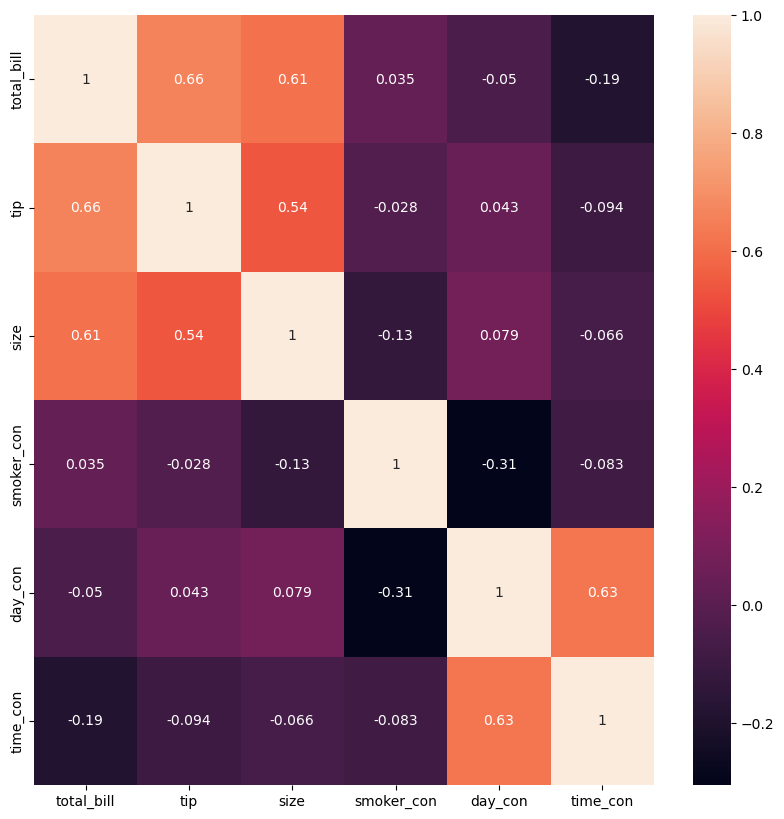

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### Observations:
- Size , Smoker and day doesn't have much impact on sex, so we can drop those features

In [31]:
df.drop(["size","smoker","smoker_con","day","day_con"],axis=1,inplace=True)

In [32]:
df

,total_bill,tip,sex,time,time_con
0,7.25,1.00,Female,Dinner,0
1,10.59,1.61,Female,Dinner,0
2,17.47,3.50,Female,Lunch,1
3,15.04,1.96,Male,Dinner,0
4,16.00,2.00,Male,Lunch,1
...,...,...,...,...,...
309,17.47,3.50,Female,Lunch,1
310,20.27,2.83,Female,Lunch,1
311,24.27,2.03,Male,Dinner,0
312,14.07,2.50,Male,Dinner,0


## EDA

### Check for outliers

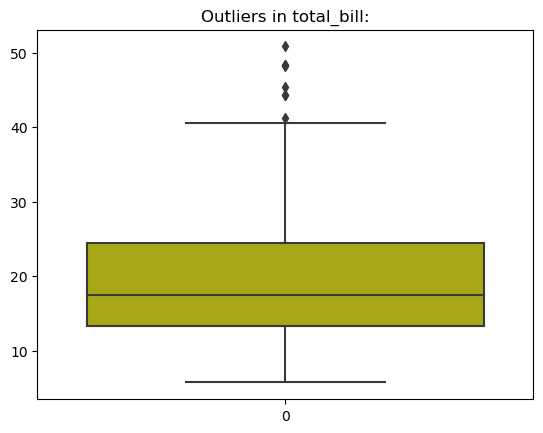

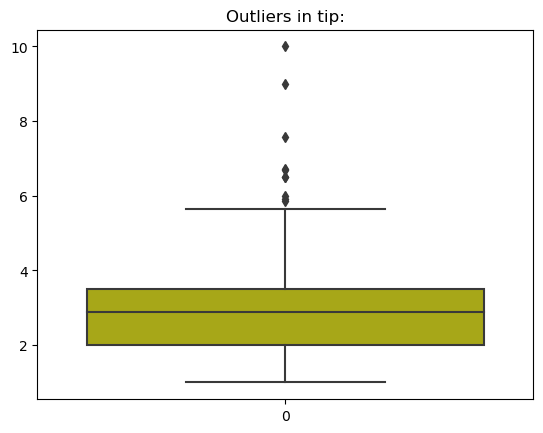

In [33]:
for i in df.columns:
    if i not in ["sex_con","time_con","sex","time"]:
        sns.boxplot(df[i],color="y")
        plt.title("Outliers in "+i+":")
        plt.show()

### Remove outliers by finding them

In [34]:
for i in df.columns:
    if i not in ["sex_con","time_con","sex","time"]:
        minimum,q1,middile,q3,maximum=np.quantile(df[i],[0,0.25,0.50,0.75,1])
        IQR=q3-q1
        lower_fence=q1-(1.5*IQR)
        higher_fence=q3+(1.5*IQR)
        print("In "+i+" any values beyond the range "+str(lower_fence)+" and "+str(higher_fence)+" are outliers")

In total_bill any values beyond the range -3.2112499999999997 and 41.05875 are outliers
In tip any values beyond the range -0.25 and 5.75 are outliers


In [35]:
df=df[df["total_bill"]<=41.05875]

In [36]:
df=df[df["tip"]<=5.75]

In [37]:
df

,total_bill,tip,sex,time,time_con
0,7.25,1.00,Female,Dinner,0
1,10.59,1.61,Female,Dinner,0
2,17.47,3.50,Female,Lunch,1
3,15.04,1.96,Male,Dinner,0
4,16.00,2.00,Male,Lunch,1
...,...,...,...,...,...
309,17.47,3.50,Female,Lunch,1
310,20.27,2.83,Female,Lunch,1
311,24.27,2.03,Male,Dinner,0
312,14.07,2.50,Male,Dinner,0


## Check the Types of Distributions

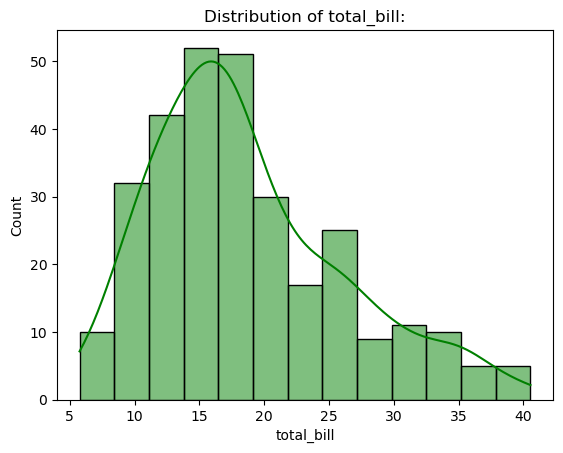

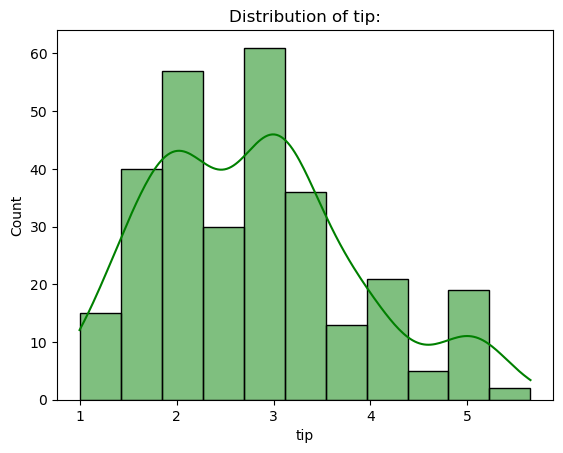

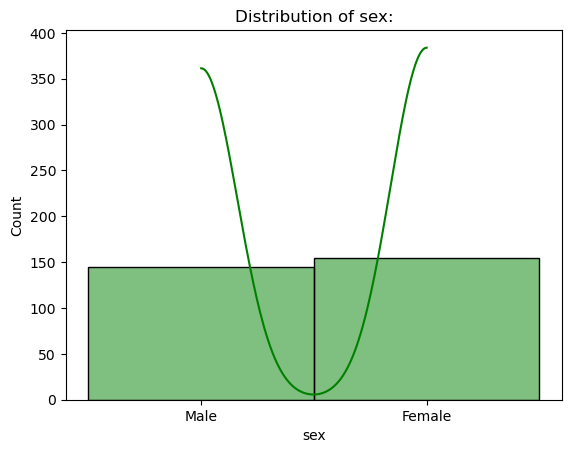

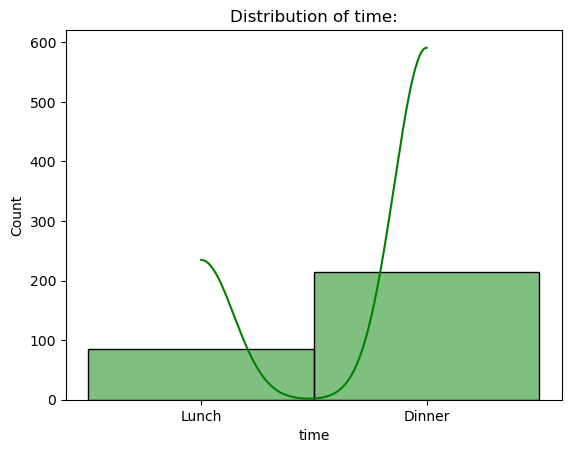

In [38]:
for i in df.columns:
    if i not in ["sex_con","time_con"]:
        sns.histplot(df[i],color="g",kde=True)
        plt.title("Distribution of "+i+":")
        plt.show()

### Observations:
- As time was in Bernoulli Distribution, we can use Bernoulli Naive Bayes

### Total Bill vs Tips w.r.t gender

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

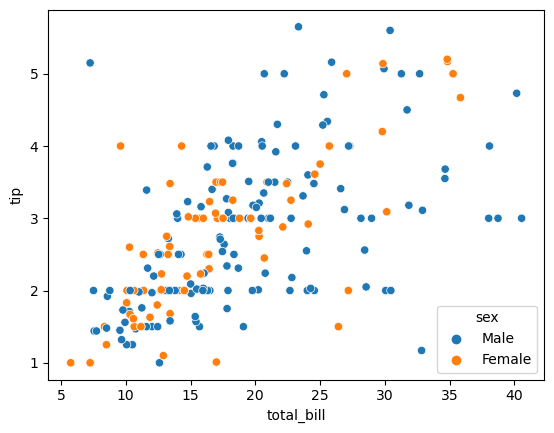

In [39]:
sns.scatterplot(x=df["total_bill"],y=df["tip"],hue=df["sex"])

### Total Bill vs Tips w.r.t Time

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

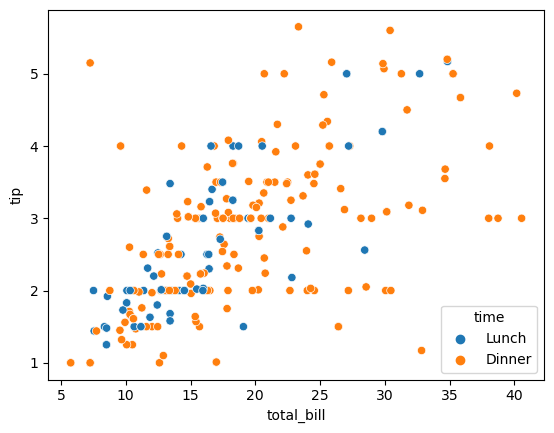

In [40]:
sns.scatterplot(x=df["total_bill"],y=df["tip"],hue=df["time"])

## Divide Data between Independent and Dependent Features

### Independent Features

In [41]:
x=df.drop(["sex","time"],axis=1)

In [42]:
x

,total_bill,tip,time_con
0,7.25,1.00,0
1,10.59,1.61,0
2,17.47,3.50,1
3,15.04,1.96,0
4,16.00,2.00,1
...,...,...,...
309,17.47,3.50,1
310,20.27,2.83,1
311,24.27,2.03,0
312,14.07,2.50,0


### Dependent Features

In [43]:
y=df["sex"]

In [44]:
y

0      Female
1      Female
2      Female
3        Male
4        Male
        ...  
309    Female
310    Female
311      Male
312      Male
313      Male
Name: sex, Length: 299, dtype: category
Categories (2, object): ['Male', 'Female']

## Model Building

### Import the Model

In [45]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB

In [46]:
model=BernoulliNB()

### Split Data into Train and Test

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
random_state=90
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35)

### Train our Model

In [49]:
model.fit(x_train,y_train)

BernoulliNB()

### Make Predictions

In [50]:
y_pred=model.predict(x_test)

In [51]:
y_pred

array(['Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Female'], dty

## Accuracy Metrics

In [52]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Text(50.722222222222214, 0.5, 'Predicted')

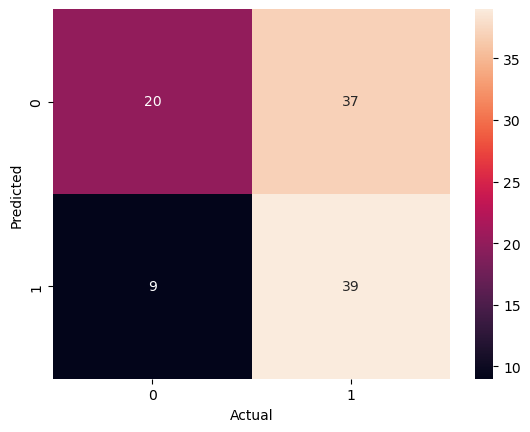

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Female       0.69      0.35      0.47        57
        Male       0.51      0.81      0.63        48

    accuracy                           0.56       105
   macro avg       0.60      0.58      0.55       105
weighted avg       0.61      0.56      0.54       105



## HyperParameter Tuning

In [55]:
grid={
    "alpha":[1.0,2.0,3.0,4.0,5.0,1.2,1.3],
    "force_alpha":[True,False],
    "binarize":[0.0,7.0,60.0,270.0,900.0],
    "fit_prior":[True,False]
}

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
model2=BernoulliNB()

In [58]:
clf=GridSearchCV(model2,param_grid=grid,cv=5)

In [59]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [1.0, 2.0, 3.0, 4.0, 5.0, 1.2, 1.3],
                         'binarize': [0.0, 7.0, 60.0, 270.0, 900.0],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]})

In [60]:
clf.best_params_

{'alpha': 1.0, 'binarize': 0.0, 'fit_prior': True, 'force_alpha': True}

In [61]:
model3=BernoulliNB(alpha=1.0,binarize=0.0,fit_prior=True,force_alpha=True)

In [62]:
model3.fit(x_train,y_train)

BernoulliNB(force_alpha=True)

In [63]:
y_pred=model3.predict(x_test)

In [64]:
y_pred

array(['Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Female'], dty

## Accuracy Metrics

Text(50.722222222222214, 0.5, 'Predicted')

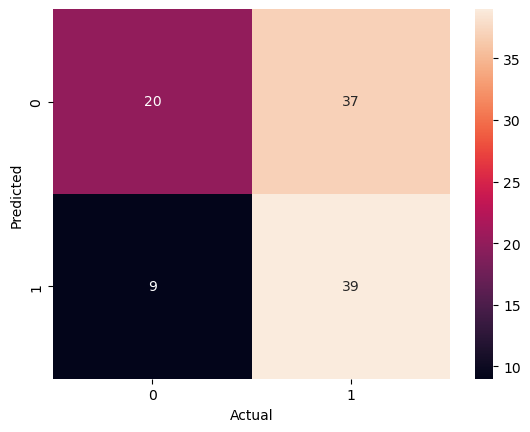

In [65]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Female       0.69      0.35      0.47        57
        Male       0.51      0.81      0.63        48

    accuracy                           0.56       105
   macro avg       0.60      0.58      0.55       105
weighted avg       0.61      0.56      0.54       105



In [67]:
accuracy_score(y_test,y_pred)

0.5619047619047619

In [68]:
import pickle
pickle.dump(model3,open("model3.pkl","wb"))